In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=data.target
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y[0], test_size=0.2)
print('X train shape:',X_train.shape)
print('X val shape:',X_val.shape)
print('y train shape:',y_train.shape)
print('y val shape:',y_val.shape)

X train shape: (455, 30)
X val shape: (114, 30)
y train shape: (455,)
y val shape: (114,)


In [6]:
def objective_function(params):
    fx = []
    if len(params)>2:
        for i in range (len(params)):
            c = params[i,0]
            gamma = params[i,1]
            model = SVC(C=c, gamma=gamma, kernel='rbf')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            fx.append(accuracy_score(y_val, y_pred))
        return fx
    else:
        model = SVC(C=params[0], gamma=params[1], kernel='rbf')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        fx.append(accuracy_score(y_val, y_pred))
        return y_pred,fx

In [7]:
bounds_parameters = [(0.1, 10.0), (0.0001, 1.0)]

In [8]:
max_opt_iter=200
D=2
size=20
limit=1

In [9]:
def fitness_fun(fx):
    fit=np.zeros((size,1))
    for i in range(len(fx)):
        if fx[i]>=0:
            fit[i]=1/(1+fx[i])  
        else:
            fit[i]=1+abs(fx[i]) 
    return fit

In [10]:
x=x=np.zeros((size,D))
for i in range(size):
    for c in range(D):
        if c==0:
            m=bounds_parameters[0][0]+random.random()*(bounds_parameters[0][1]-bounds_parameters[0][0])
            if m>bounds_parameters[0][1]:
                x[i,c]=bounds_parameters[0][1]
            elif m<bounds_parameters[0][0]:
                x[i,c]=bounds_parameters[0][0]
            else:
                x[i,c]=m
        else:
            m=bounds_parameters[1][0]+random.random()*(bounds_parameters[1][1]-bounds_parameters[1][0])
            if m>bounds_parameters[1][1]:
                x[i,c]=bounds_parameters[1][1]
            elif m<bounds_parameters[1][0]:
                x[i,c]=bounds_parameters[1][0]
            else:
                x[i,c]=m 
x

array([[9.04080286, 0.17720969],
       [0.22865617, 0.34778037],
       [6.27667048, 0.84920053],
       [5.66180347, 0.79548527],
       [4.79138759, 0.11896646],
       [9.02488287, 0.20621078],
       [3.35754671, 0.61478244],
       [4.20309869, 0.23921048],
       [6.337564  , 0.48277424],
       [7.31820046, 0.12232745],
       [2.27723564, 0.29123076],
       [2.78605815, 0.94353911],
       [7.3997961 , 0.81000085],
       [2.28329224, 0.79532652],
       [1.39125744, 0.07243194],
       [0.96881645, 0.22490097],
       [0.61271438, 0.38223284],
       [0.6496662 , 0.34396239],
       [5.36004953, 0.10625768],
       [2.46932593, 0.85873837]])

In [11]:
fx=objective_function(x)
fx

[0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141,
 0.5877192982456141]

In [12]:
fitness=fitness_fun(fx)
fitness

array([[0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425],
       [0.62983425]])

In [13]:
trial=np.zeros((size,1))
trial

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [14]:
def improve(i,x_new):
    neigh_index = random.randint(0, D-1)
    partner=int(np.ceil(np.random.random()*size))-1
    while partner == i:
        partner = int(np.ceil(np.random.random()*size))-1
    value_x=x_new[i,neigh_index]
    value_partner=x_new[partner,neigh_index]
    x_new[i,neigh_index]=value_x+ 2*(random.random()-0.5)*(value_x-value_partner)
    if neigh_index==0:
        if x_new[i,neigh_index]>bounds_parameters[0][1]:
            x_new[i,neigh_index]=bounds_parameters[0][1]
        elif x_new[i,neigh_index]<bounds_parameters[0][0]:
            x_new[i,neigh_index]=bounds_parameters[0][0]
    else:
        if x_new[i,neigh_index]>bounds_parameters[1][1]:
            x_new[i,neigh_index]=bounds_parameters[1][1]
        elif x_new[i,neigh_index]<bounds_parameters[1][0]:
            x_new[i,neigh_index]=bounds_parameters[1][0]
    obj=objective_function(x_new)
    if obj[i]>fx[i]:
        x[i,:]=x_new[i,:]
        fx[i]=obj[i]
        trial[i]=0
    else:
        trial[i]=trial[i]+1

In [15]:
def employee():
    x_new=x.copy()
    for i in range(size):
        improve(i,x_new)

In [16]:
def prob():
    sum_fit=np.sum(fitness)
    prob_=[]
    for i in range(size):
        prob_.append(fitness[i]/sum_fit)
    return np.array(prob_)    

In [17]:
def onlooker():
    prob_=prob()
    flage=0
    x_new=x.copy()
    for i in range(size):
        r=np.random.random()
        if r<prob_[i]:
            improve(i,x_new)
        else:
            for z in range(i+1,size):
                r=np.random.random()
                if r<prob_[z]:
                    improve(i,x_new)
                    flage=1
                if flage==1:
                    break
            if flage==0:         
                while(True):
                    for z in range(size):
                        r=np.random.random()
                        if r<prob_[z]: 
                            improve(i,x_new)
                            flage=1
                        if flage==1:
                            break
                    if flage==1:
                        break       

In [18]:
def scout(H):
    for i in H:
        for c in range(D):
            if c==0:
                m=bounds_parameters[0][0]+random.random()*(bounds_parameters[0][1]-bounds_parameters[0][0])
                if m>bounds_parameters[0][1]:
                    x[i,c]=bounds_parameters[0][1]
                elif m<bounds_parameters[0][0]:
                    x[i,c]=bounds_parameters[0][0]
                else:
                    x[i,c]=m
            else:
                m=bounds_parameters[1][0]+random.random()*(bounds_parameters[1][1]-bounds_parameters[1][0])
                if m>bounds_parameters[1][1]:
                    x[i,c]=bounds_parameters[1][1]
                elif m<bounds_parameters[1][0]:
                    x[i,c]=bounds_parameters[1][0]
                else:
                    x[i,c]=m 

In [19]:
error=.000001
best_value=0
x_best_value=[]
for iteration in range(max_opt_iter):
    for i in range(size):
        employee()
    fitness=fitness_fun(fx)    
    for i in range(size):  
        onlooker()
    fitness=fitness_fun(fx)    
    H=[]
    for i in range(size):
        if trial[i]>limit:
            H.append(i)
            trial[i]=0
    scout(H)
    fx=objective_function(x)
    fitness=fitness_fun(fx) 
    if iteration!=0 and max(fx)==best_value or abs(max(fx)-best_value) ==error:
        print('prv value is:',best_value,' current value is:',max(fx))
        break
    elif iteration!=0 and max(fx)<best_value:
        print('prv value is:',best_value,' current value is:',max(fx),'continue')
        continue        
    index=np.argmax(fx)
    best_value=fx[index]
    x_best_value=x[index].copy()
    print('iteration #',iteration+1)
    print('best value is:',best_value)
    print('best_x is:',x_best_value)

iteration # 1
best value is: 0.956140350877193
best_x is: [1.36778814e+00 1.00000000e-04]
prv value is: 0.956140350877193  current value is: 0.5877192982456141 continue
prv value is: 0.956140350877193  current value is: 0.956140350877193


In [20]:
best_value

0.956140350877193

In [21]:
x_best_value

array([1.36778814e+00, 1.00000000e-04])

In [22]:
y_pred,value=objective_function(x_best_value)
print(value)

[0.956140350877193]


array([[42,  5],
       [ 0, 67]], dtype=int64)

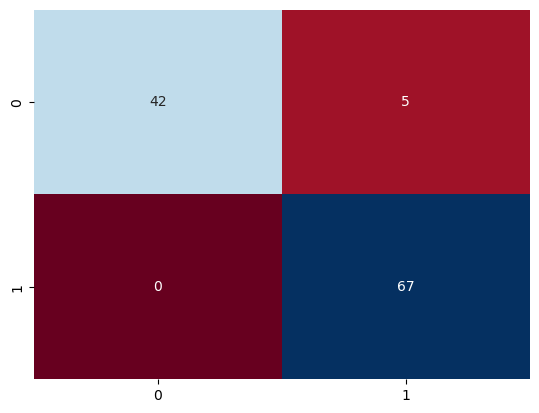

In [23]:
CM = confusion_matrix(y_val, y_pred)
sns.heatmap(CM, annot=True, fmt='g',cbar=False,cmap='RdBu')
CM